In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()

In [3]:
#from google.colab import drive
#drive.mount('/gdrive')

In [4]:
data = pd.read_csv("Suicide_Detection.csv")
data


,Unnamed: 0.1,Unnamed: 0,text,class
0,0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,1,3,Am I weird I don't get affected by compliments...,non-suicide
2,2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,3,8,i need helpjust help me im crying so hard,suicide
4,4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...,...
34095,34095,51166,Stuck in a 5 year rutI'm really typing this to...,suicide
34096,34096,51167,gib notifications comment nowwwww,non-suicide
34097,34097,51168,Climate change is driving me to suicideI was g...,suicide
34098,34098,51169,"Ask me, a M15 Norwegian anything I'm bored af,...",non-suicide


In [5]:
data["class"]

0            suicide
1        non-suicide
2        non-suicide
3            suicide
4            suicide
            ...     
34095        suicide
34096    non-suicide
34097        suicide
34098    non-suicide
34099    non-suicide
Name: class, Length: 34100, dtype: object

In [6]:
type(data["Unnamed: 0"][3])

numpy.int64

In [7]:
text = data['text']
label = data['class']

In [8]:
text[0]

"Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen."

In [9]:
classes_list = ["non-suicide", "suicide"]
label_index = data['class'].apply(classes_list.index)
label = np.asarray(label_index)

In [10]:
data['label'] = label

In [11]:
data

,Unnamed: 0.1,Unnamed: 0,text,class,label
0,0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
1,1,3,Am I weird I don't get affected by compliments...,non-suicide,0
2,2,4,Finally 2020 is almost over... So I can never ...,non-suicide,0
3,3,8,i need helpjust help me im crying so hard,suicide,1
4,4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1
...,...,...,...,...,...
34095,34095,51166,Stuck in a 5 year rutI'm really typing this to...,suicide,1
34096,34096,51167,gib notifications comment nowwwww,non-suicide,0
34097,34097,51168,Climate change is driving me to suicideI was g...,suicide,1
34098,34098,51169,"Ask me, a M15 Norwegian anything I'm bored af,...",non-suicide,0


In [12]:
data.drop("class", axis = 1, inplace  =True)
data

,Unnamed: 0.1,Unnamed: 0,text,label
0,0,2,Ex Wife Threatening SuicideRecently I left my ...,1
1,1,3,Am I weird I don't get affected by compliments...,0
2,2,4,Finally 2020 is almost over... So I can never ...,0
3,3,8,i need helpjust help me im crying so hard,1
4,4,9,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...,...,...
34095,34095,51166,Stuck in a 5 year rutI'm really typing this to...,1
34096,34096,51167,gib notifications comment nowwwww,0
34097,34097,51168,Climate change is driving me to suicideI was g...,1
34098,34098,51169,"Ask me, a M15 Norwegian anything I'm bored af,...",0


In [13]:
data["label"].value_counts()

label
0    17172
1    16928
Name: count, dtype: int64

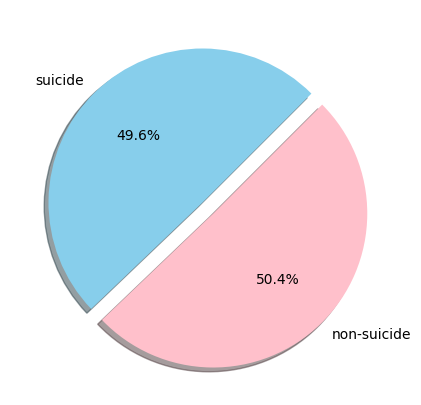

In [14]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["suicide","non-suicide"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [15]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   
data['text']=data['text'].apply(preprocessor)

In [16]:
data

,Unnamed: 0.1,Unnamed: 0,text,label
0,0,2,ex wife threatening suiciderecently i left my ...,1
1,1,3,am i weird i don t get affected by compliments...,0
2,2,4,finally 2020 is almost over so i can never hea...,0
3,3,8,i need helpjust help me im crying so hard,1
4,4,9,i m so losthello my name is adam 16 and i ve b...,1
...,...,...,...,...
34095,34095,51166,stuck in a 5 year ruti m really typing this to...,1
34096,34096,51167,gib notifications comment nowwwww,0
34097,34097,51168,climate change is driving me to suicidei was g...,1
34098,34098,51169,ask me a m15 norwegian anything i m bored af i...,0


In [17]:
data = data[:10000]

In [18]:
data["label"].value_counts()

label
0    5085
1    4915
Name: count, dtype: int64

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# for i in range(len(data['text'])):
#     data['text'][i]  =data['text'][i].lower()

In [21]:
data

,Unnamed: 0.1,Unnamed: 0,text,label
0,0,2,ex wife threatening suiciderecently i left my ...,1
1,1,3,am i weird i don t get affected by compliments...,0
2,2,4,finally 2020 is almost over so i can never hea...,0
3,3,8,i need helpjust help me im crying so hard,1
4,4,9,i m so losthello my name is adam 16 and i ve b...,1
...,...,...,...,...
9995,9995,15026,help me plz i got my first reward aka the gold...,0
9996,9996,15028,anyone wanna chat im a bit bored right now jus...,0
9997,9997,15029,i m on a bridgei don t want to die but right n...,1
9998,9998,15030,this is serious my dad just turned gay anyone ...,0


In [22]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [23]:
for i in range(len(data['text'])):
    data['text'][i]  =  np.array(tokenizer_porter(data['text'][i]))

In [24]:
data

,Unnamed: 0.1,Unnamed: 0,text,label
0,0,2,"[ex, wife, threaten, suiciderec, i, left, my, ...",1
1,1,3,"[am, i, weird, i, don, t, get, affect, by, com...",0
2,2,4,"[final, 2020, is, almost, over, so, i, can, ne...",0
3,3,8,"[i, need, helpjust, help, me, im, cri, so, hard]",1
4,4,9,"[i, m, so, losthello, my, name, is, adam, 16, ...",1
...,...,...,...,...
9995,9995,15026,"[help, me, plz, i, got, my, first, reward, aka...",0
9996,9996,15028,"[anyon, wanna, chat, im, a, bit, bore, right, ...",0
9997,9997,15029,"[i, m, on, a, bridgei, don, t, want, to, die, ...",1
9998,9998,15030,"[thi, is, seriou, my, dad, just, turn, gay, an...",0


In [25]:
data["text"][0]

array(['ex', 'wife', 'threaten', 'suiciderec', 'i', 'left', 'my', 'wife',
       'for', 'good', 'becaus', 'she', 'ha', 'cheat', 'on', 'me', 'twice',
       'and', 'lie', 'to', 'me', 'so', 'much', 'that', 'i', 'have',
       'decid', 'to', 'refus', 'to', 'go', 'back', 'to', 'her', 'as',
       'of', 'a', 'few', 'day', 'ago', 'she', 'began', 'threaten',
       'suicid', 'i', 'have', 'tirelessli', 'spent', 'these', 'paat',
       'few', 'day', 'talk', 'her', 'out', 'of', 'it', 'and', 'she',
       'keep', 'hesit', 'becaus', 'she', 'want', 'to', 'believ', 'i',
       'll', 'come', 'back', 'i', 'know', 'a', 'lot', 'of', 'peopl',
       'will', 'threaten', 'thi', 'in', 'order', 'to', 'get', 'their',
       'way', 'but', 'what', 'happen', 'if', 'she', 'realli', 'doe',
       'what', 'do', 'i', 'do', 'and', 'how', 'am', 'i', 'suppos', 'to',
       'handl', 'her', 'death', 'on', 'my', 'hand', 'i', 'still', 'love',
       'my', 'wife', 'but', 'i', 'cannot', 'deal', 'with', 'get', 'cheat',
      

In [26]:
print(data["text"][0])

['ex' 'wife' 'threaten' 'suiciderec' 'i' 'left' 'my' 'wife' 'for' 'good'
 'becaus' 'she' 'ha' 'cheat' 'on' 'me' 'twice' 'and' 'lie' 'to' 'me' 'so'
 'much' 'that' 'i' 'have' 'decid' 'to' 'refus' 'to' 'go' 'back' 'to' 'her'
 'as' 'of' 'a' 'few' 'day' 'ago' 'she' 'began' 'threaten' 'suicid' 'i'
 'have' 'tirelessli' 'spent' 'these' 'paat' 'few' 'day' 'talk' 'her' 'out'
 'of' 'it' 'and' 'she' 'keep' 'hesit' 'becaus' 'she' 'want' 'to' 'believ'
 'i' 'll' 'come' 'back' 'i' 'know' 'a' 'lot' 'of' 'peopl' 'will'
 'threaten' 'thi' 'in' 'order' 'to' 'get' 'their' 'way' 'but' 'what'
 'happen' 'if' 'she' 'realli' 'doe' 'what' 'do' 'i' 'do' 'and' 'how' 'am'
 'i' 'suppos' 'to' 'handl' 'her' 'death' 'on' 'my' 'hand' 'i' 'still'
 'love' 'my' 'wife' 'but' 'i' 'cannot' 'deal' 'with' 'get' 'cheat' 'on'
 'again' 'and' 'constantli' 'feel' 'insecur' 'i' 'm' 'worri' 'today' 'may'
 'be' 'the' 'day' 'she' 'doe' 'it' 'and' 'i' 'hope' 'so' 'much' 'it'
 'doesn' 't' 'happen']


In [27]:
#data.to_csv("filtered_data.csv")

In [28]:
#data = pd.read_csv("/gdrive/filtered_data.csv")

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [30]:
from nltk.corpus import stopwords
stops=stopwords.words('english')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
def remove_stopwords(lower_tokens):
  filtered_words=[]
  for s in lower_tokens:
    temp=[]
    for token in s:
      if token not in stops:
        temp.append(token)
    filtered_words.append(temp)
  return filtered_words


In [35]:
t_list = remove_stopwords(data['text'])
data['text'] = t_list

TypeError: iteration over a 0-d array

In [ ]:
for i in range(len(data['text'])):
    data['text'][i]  =  " ".join(data['text'][i])

In [ ]:
data

In [34]:
data["text"][0]

'ex wife threaten suiciderec left wife good becaus ha cheat twice lie much decid refus go back day ago began threaten suicid tirelessli spent paat day talk keep hesit becaus want believ come back know lot peopl threaten thi order get way happen realli doe suppos handl death hand still love wife cannot deal get cheat constantli feel insecur worri today may day doe hope much happen'

In [35]:
#data.to_csv("filtered1_data.csv")
#data = pd.read_csv("filtered1_data.csv")

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
y =data['label'].values
tfidf = vectorizer.fit(data['text'])
x = vectorizer.transform(data["text"])

In [37]:
tfidf.vocabulary_

{'ex': 6752,
 'wife': 19633,
 'threaten': 17844,
 'suiciderec': 17166,
 'left': 10640,
 'good': 8113,
 'becaus': 2742,
 'ha': 8407,
 'cheat': 3911,
 'twice': 18420,
 'lie': 10735,
 'much': 12042,
 'decid': 5187,
 'refus': 14789,
 'go': 8044,
 'back': 2502,
 'day': 5090,
 'ago': 1560,
 'began': 2779,
 'suicid': 17136,
 'tirelessli': 17972,
 'spent': 16602,
 'paat': 13154,
 'talk': 17439,
 'keep': 10280,
 'hesit': 8824,
 'want': 19345,
 'believ': 2810,
 'come': 4338,
 'know': 10408,
 'lot': 11029,
 'peopl': 13433,
 'thi': 17746,
 'order': 12939,
 'get': 7935,
 'way': 19396,
 'happen': 8519,
 'realli': 14646,
 'doe': 5826,
 'suppos': 17254,
 'handl': 8502,
 'death': 5154,
 'hand': 8489,
 'still': 16864,
 'love': 11043,
 'cannot': 3627,
 'deal': 5143,
 'constantli': 4525,
 'feel': 7098,
 'insecur': 9682,
 'worri': 19810,
 'today': 18026,
 'may': 11380,
 'hope': 9043,
 'weird': 19476,
 'affect': 1483,
 'compliment': 4411,
 'someon': 16435,
 'irl': 9856,
 'internet': 9765,
 'stranger': 16936

In [38]:
import pickle

pickle.dump(tfidf, open("tfidf.pickle", "wb"))
pickle.dump(x, open("train_comment_features.pickle", "wb"))
# pickle.dump(test_comment_features, open("test_comment_features.pickle", "wb"))

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3,shuffle=False)

In [40]:
X_train

<7000x20307 sparse matrix of type '<class 'numpy.float64'>'
	with 316010 stored elements in Compressed Sparse Row format>

In [41]:
X_test

<3000x20307 sparse matrix of type '<class 'numpy.float64'>'
	with 139620 stored elements in Compressed Sparse Row format>

In [42]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500)
classifier = clf.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   14.2s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   15.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   15.1s finished


Accuracy: 0.9116666666666666


In [43]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[1392  110]
 [ 155 1343]]


<function matplotlib.pyplot.show(close=None, block=None)>

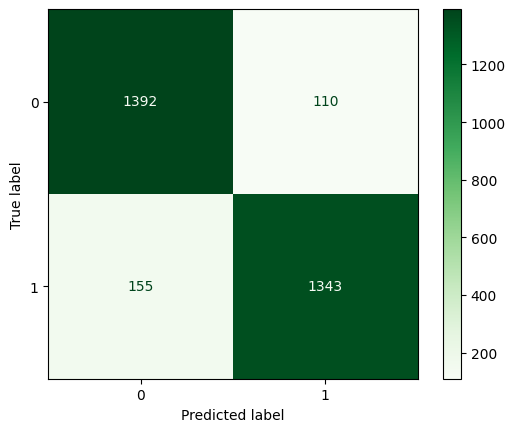

In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Greens)
plt.show

In [45]:
print("Classification Report\n\n")
print(classification_report(y_test,y_pred))


Classification Report


              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1502
           1       0.92      0.90      0.91      1498

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



In [46]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [47]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('precision:',metrics.precision_score(y_test,y_pred))
print('recall:',metrics.recall_score(y_test,y_pred))
print('f1-score:',metrics.f1_score(y_test,y_pred))


accuracy: 0.9116666666666666
precision: 0.9242945629731589
recall: 0.8965287049399199
f1-score: 0.910199932226364


In [48]:
from sklearn.model_selection import StratifiedKFold

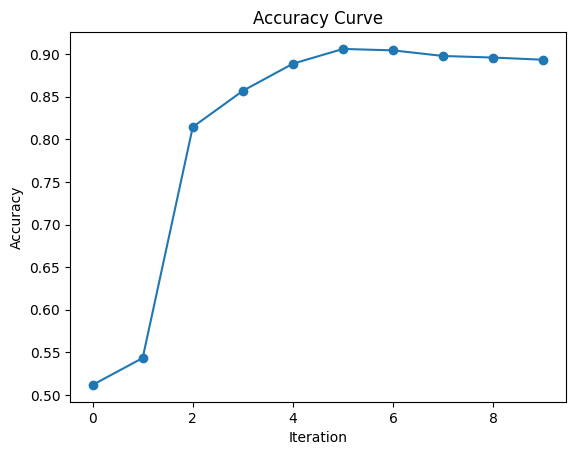

In [49]:
# def roc_plotting(model,model_name):
#   cv = StratifiedKFold(n_splits=10)

#   fig1 = plt.figure(figsize=[12,8])
#   ax1 = fig1.add_subplot(111,aspect = 'equal')
#   tprs = []
#   aucs = []
#   mean_fpr = np.linspace(0,1,100)
#   i = 1
#   for train,test in cv.split(X_train, X_test):
#       model.fit(X.iloc[train].values,Y.iloc[train].values)
#       prediction = model.predict_proba(X.iloc[test].values)
#       fpr, tpr, t = roc_curve(Y[test], prediction[:, 1])
#       tprs.append(np.interp(mean_fpr, fpr, tpr))
#       roc_auc = auc(fpr, tpr)
#       aucs.append(roc_auc)
#       plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
#       i= i+1

#   plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
#   mean_tpr = np.mean(tprs, axis=0)
#   mean_auc = auc(mean_fpr, mean_tpr)
#   plt.plot(mean_fpr, mean_tpr, color='blue',
#           label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
#   plt.xlabel('False Positive Rate')
#   plt.ylabel('True Positive Rate')
#   plt.title(f'ROC For {model_name}')
#   plt.legend(loc="lower right")


# roc_plotting(classifier,"LogisticRegressionCV")



import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Plot the accuracy curve
plt.plot(np.mean(classifier.scores_[1], axis=0), marker = 'o')
plt.title('Accuracy Curve')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

In [50]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [55]:
import pickle
pickle.dump(classifier, open("lr_model.sav", 'wb'))
 
# some time later...
 
# load the model from disk
import pickle
loaded_model = pickle.load(open("lr_model.sav", 'rb'))
result = loaded_model.score(X_test, y_test)

In [56]:
result

0.9116666666666666

# Deep learning model

In [123]:
x.shape

(10000, 20307)

In [124]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
#model.add(LSTM(128,  input_shape=(20307, 20307),return_sequences=True))
model.add(Dense(3, activation='relu', input_shape=(20307,)))
#model.add(Dropout(.4))
#model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 60924     
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 60,928
Trainable params: 60,928
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.fit(X_train.toarray(), y_train, validation_split =.2, epochs=30, verbose=1)

Epoch 1/30
175/175 [==============================] - 4s 10ms/step - loss: 0.6283 - val_loss: 0.5605
Epoch 2/30
175/175 [==============================] - 1s 6ms/step - loss: 0.4888 - val_loss: 0.4473
Epoch 3/30
175/175 [==============================] - 1s 7ms/step - loss: 0.3796 - val_loss: 0.3709
Epoch 4/30
175/175 [==============================] - 1s 7ms/step - loss: 0.3040 - val_loss: 0.3208
Epoch 5/30
175/175 [==============================] - 1s 7ms/step - loss: 0.2523 - val_loss: 0.2902
Epoch 6/30
175/175 [==============================] - 1s 8ms/step - loss: 0.2153 - val_loss: 0.2699
Epoch 7/30
175/175 [==============================] - 1s 8ms/step - loss: 0.1873 - val_loss: 0.2556
Epoch 8/30
175/175 [==============================] - 1s 7ms/step - loss: 0.1652 - val_loss: 0.2460
Epoch 9/30
175/175 [==============================] - 1s 7ms/step - loss: 0.1469 - val_loss: 0.2395
Epoch 10/30
175/175 [==============================] - 1s 7ms/step - loss: 0.1317 - val_loss: 0.235

In [126]:
y_pred = model.predict(X_test.toarray())

94/94 [==============================] - 0s 3ms/step


In [127]:
y_pred

array([[0.9969612 ],
       [0.99987096],
       [0.8100697 ],
       ...,
       [0.95802516],
       [0.00681922],
       [0.9995963 ]], dtype=float32)

In [128]:
y_pred = (y_pred>.5)*1

In [129]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[1356  146]
 [ 144 1354]]


In [131]:
(cm[1, 1] + cm[0, 0])/sum(sum(cm))

0.9033333333333333

In [132]:
# 

# deployement part

In [133]:
text = input("Enter a text to check if it is suicidal: ")

from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

text = np.array(tokenizer_porter(text))

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops=stopwords.words('english')
nltk.download('stopwords')


def remove_stopwords(lower_tokens):
  filtered_words=[]
  for s in lower_tokens:
    temp=[]
    for token in s:
      if token not in stops:
        temp.append(token)
    filtered_words.append(temp)
  return filtered_words


f_text = np.array(remove_stopwords([text])[0])




f_text = " ".join(f_text)


import pickle

tfidf_vectorizer = pickle.load(open("tfidf.pickle", "rb"))
ss2 = tfidf_vectorizer.transform([f_text])

# load the model from disk
import pickle
loaded_model = pickle.load(open("lr_model.sav", 'rb'))
result = loaded_model.predict(ss2)

Enter a text to check if it is suicidal: raju will die soon


[nltk_data] Downloading package stopwords to C:\Users\NARALA
[nltk_data]     SIDDHARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\NARALA
[nltk_data]     SIDDHARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
result[0]

1

In [ ]:
tfidf

In [ ]:
corpus = np.array([])

In [ ]:
X_train.shape

In [ ]:
# create the model
model = Sequential()
#model.add(Embedding(top_words, 32, input_length=max_words))
#model.add(Conv1D(32, 3, padding='same', activation='relu'))
#model.add(MaxPooling1D())
model.add(LSTM(64))
#model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Comparitive Ananlysis

# SVM 

In [73]:
from sklearn.svm import SVC

In [77]:
Classifier = SVC(kernel="linear")

# Training the model on the training data and labels
Classifier.fit(X_train, y_train)

# Using the model to predict the labels of the test data
y_predSVC = Classifier.predict(X_test)

# Evaluating the accuracy of the model using the sklearn functions
accuracySVM = accuracy_score(y_test,y_pred)*100

In [78]:
accuracy

91.63333333333334

In [79]:
print('accuracy:',metrics.accuracy_score(y_test,y_predSVC))
print('precision:',metrics.precision_score(y_test,y_predSVC))
print('recall:',metrics.recall_score(y_test,y_predSVC))
print('f1-score:',metrics.f1_score(y_test,y_predSVC))

accuracy: 0.9163333333333333
precision: 0.9244383934649422
recall: 0.9065420560747663
f1-score: 0.9154027637344119


# XGBoost

In [80]:
import xgboost

In [81]:
classifierXG = xgboost.XGBClassifier()
classifierXG.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [83]:
y_predXG = classifier.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
accuracyXG = accuracy_score(y_test, y_pred)
print(accuracyXG)

0.9163333333333333


In [85]:
print('accuracy:',metrics.accuracy_score(y_test,y_predXG))
print('precision:',metrics.precision_score(y_test,y_predXG))
print('recall:',metrics.recall_score(y_test,y_predXG))
print('f1-score:',metrics.f1_score(y_test,y_predXG))

accuracy: 0.9116666666666666
precision: 0.9242945629731589
recall: 0.8965287049399199
f1-score: 0.910199932226364


# KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
y_predK=knn.predict(X_test)

In [90]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.797

In [91]:
print('accuracy:',metrics.accuracy_score(y_test,y_predK))
print('precision:',metrics.precision_score(y_test,y_predK))
print('recall:',metrics.recall_score(y_test,y_predK))
print('f1-score:',metrics.f1_score(y_test,y_predK))

accuracy: 0.797
precision: 0.8815450643776824
recall: 0.6855807743658211
f1-score: 0.7713105520090124
